# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

## Authentication

* Create an OpenML account (free) on http://www.openml.org. 
* After logging in, open your account page (avatar on the top right)
* Open 'Account Settings', then 'API authentication' to find your API key.

There are two ways to authenticate:  

* Create a plain text file `~/.openml/config` with the line 'apikey=MYKEY', replacing MYKEY with your API key.
* Run the code below, replacing 'YOURKEY' with your API key.

In [1]:
# Uncomment and set your OpenML key. Don't share your key with others.
import openml as oml
#oml.config.apikey = 'YOURKEY'

# It all starts with data
Explore thousands of datasets, or share your own

### List datasets

In [2]:
import openml as oml
openml_list = oml.datasets.list_datasets() # Returns a dict

# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
print("First 10 of %s datasets..." % len(datalist))
datalist.head(n=10)

First 10 of 2521 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
2,2,anneal,898,39,5
3,3,kr-vs-kp,3196,37,2
4,4,labor,57,17,2
5,5,arrhythmia,452,280,13
6,6,letter,20000,17,26
7,7,audiology,226,70,24
8,8,liver-disorders,345,7,16
9,9,autos,205,26,6
10,10,lymph,148,19,4
11,11,balance-scale,625,5,3


In [16]:
openml_list = oml.datasets.list_datasets(number_instances = '10000..20000', number_features = '10..20') # Returns a dict
# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
print("Found 11 datasets")
datalist.head(n=11)

Found 11 datasets


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
6,6,letter,20000,17,26
32,32,pendigits,10992,17,10
216,216,elevators,16599,19,61
846,846,elevators,16599,19,2
977,977,letter,20000,17,2
1019,1019,pendigits,10992,17,2
1120,1120,MagicTelescope,19020,12,2
1199,1199,BNG(echoMonths),17496,10,17491
1222,1222,letter-challenge-unlabeled.arff,20000,17,3
1414,1414,Kaggle_bike_sharing_demand_challange,10886,12,822


In [20]:
openml_list = oml.datasets.list_datasets(data_name = 'eeg-eye-state') # Returns a dict
# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
#print("Found 11 datasets")
datalist.head(n=11)

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1471,1471,eeg-eye-state,14980,15,2


### Exercise
- Find datasets with more than 10000 examples
- Find a dataset called 'eeg_eye_state'
- Find all datasets with more than 50 classes

In [3]:
datalist[datalist.NumberOfInstances>10000
        ].sort_values(['NumberOfInstances']).head(n=20)

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
23515,23515,sulfur,10081.0,7.0,-1.0
372,372,internet_usage,10108.0,72.0,46.0
981,981,kdd_internet_usage,10108.0,69.0,2.0
1536,1536,volcanoes-b6,10130.0,4.0,5.0
4562,4562,InternetUsage,10168.0,72.0,-1.0
1531,1531,volcanoes-b1,10176.0,4.0,5.0
1534,1534,volcanoes-b4,10190.0,4.0,5.0
1459,1459,artificial-characters,10218.0,8.0,10.0
1478,1478,har,10299.0,562.0,6.0
1533,1533,volcanoes-b3,10386.0,4.0,5.0


In [4]:
datalist.query('name == "eeg-eye-state"')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1471,1471,eeg-eye-state,14980.0,15.0,2.0


In [3]:
datalist.query('NumberOfClasses == -1')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
189,189,kin8nm,8192,9,-1
191,191,wisconsin,194,33,-1
192,192,vineyard,52,4,-1
193,193,bolts,40,8,-1
194,194,cleveland,303,14,-1
195,195,auto_price,159,16,-1
196,196,autoMpg,398,8,-1
197,197,cpu_act,8192,22,-1
198,198,delta_elevators,9517,7,-1
199,199,fruitfly,125,5,-1


## Download datasets
This is done based on the dataset ID ('did').

In [6]:
dataset = oml.datasets.get_dataset(1471)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://www.openml.org/data/download/1587924/eeg-eye-state.ARFF
**Author**: Oliver Roesler, it12148'@'lehre.dhbw-stuttgart.de  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**:   

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video fr


Get the actual data.  
Returned as numpy array, with meta-info (e.g. target feature, feature names,...)

In [7]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute,
    return_attribute_names=True,
)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg['class'] = y
print(eeg[:10])

            V1           V2           V3           V4           V5  \
0  4329.229980  4009.229980  4289.229980  4148.209961  4350.259766   
1  4324.620117  4004.620117  4293.850098  4148.720215  4342.049805   
2  4327.689941  4006.669922  4295.379883  4156.410156  4336.919922   
3  4328.720215  4011.790039  4296.410156  4155.899902  4343.589844   
4  4326.149902  4011.790039  4292.310059  4151.279785  4347.689941   
5  4321.029785  4004.620117  4284.100098  4153.330078  4345.640137   
6  4319.490234  4001.030029  4280.509766  4151.790039  4343.589844   
7  4325.640137  4006.669922  4278.459961  4143.080078  4344.100098   
8  4326.149902  4010.770020  4276.410156  4139.490234  4345.129883   
9  4326.149902  4011.280029  4276.919922  4142.049805  4344.100098   

            V6           V7           V8           V9          V10  \
0  4586.149902  4096.919922  4641.029785  4222.049805  4238.459961   
1  4586.669922  4097.439941  4638.970215  4210.770020  4226.669922   
2  4583.589844  409

## Train machine learning models
Train a scikit-learn model on the data manually

In [9]:
from sklearn import neighbors

dataset = oml.datasets.get_dataset(1471)
X, y = dataset.get_data(target=dataset.default_target_attribute)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

You can also ask for meta-data to automatically preprocess the data
- e.g. categorical features -> do feature encoding

In [10]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True,
)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

Categorical features: [True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Listing tasks

In [11]:
task_list = oml.tasks.list_tasks(size=5000) # Get first 5000 tasks

mytasks = pd.DataFrame.from_dict(task_list, orient='index')
mytasks = mytasks[['tid','did','name','task_type','estimation_procedure','evaluation_measures']]
print("First 5 of %s tasks:" % len(mytasks))
mytasks.head()

First 5 of 5000 tasks:


,tid,did,name,task_type,estimation_procedure,evaluation_measures
2,2,2,anneal,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
3,3,3,kr-vs-kp,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
4,4,4,labor,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
5,5,5,arrhythmia,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
6,6,6,letter,Supervised Classification,10-fold Crossvalidation,predictive_accuracy


Search for the tasks on the 'eeg-eye-state' dataset

In [12]:
mytasks.query('name=="eeg-eye-state"')

,tid,did,name,task_type,estimation_procedure,evaluation_measures
9983,9983,1471,eeg-eye-state,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
14951,14951,1471,eeg-eye-state,Supervised Classification,10-fold Crossvalidation,NaN


## Download tasks

In [13]:
from pprint import pprint
task = oml.tasks.get_task(14951)
pprint(vars(task))

{'class_labels': ['1', '2'],
 'cost_matrix': None,
 'dataset_id': 1471,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/14951/Task_14951_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'Class',
 'task_id': 14951,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Runs: Easily explore models by running them on tasks
We can run (many) scikit-learn algorithms on (many) OpenML tasks.

In [14]:
from sklearn import ensemble, tree

# Get a task
task = oml.tasks.get_task(14951)

# Build any classifier or pipeline
clf = tree.ExtraTreeClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)

Share the run on the OpenML server

In [15]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/7943198


### It also works with pipelines
When you need to handle 'dirty' data, build pipelines to model then automatically

In [16]:
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer(strategy='median')),
            ('OneHotEncoder', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)

run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/7943199


## Download previous results
You can download all your results anytime, as well as everybody else's  
List runs by uploader, flow, task, tag, id, ...

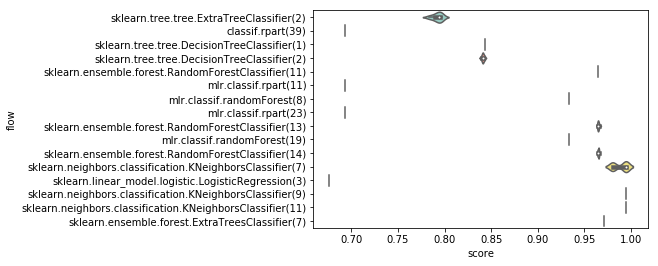

In [17]:
import seaborn as sns
import pandas as pd

# Get the list of runs for task 14951
myruns = oml.runs.list_runs(task=[14951], size=100)

# Download the tasks and plot the scores
scores = []
for id, _ in myruns.items():
    run = oml.runs.get_run(id)
    scores.append({"flow":run.flow_name, "score":run.evaluations['area_under_roc_curve']})
    
sns.violinplot(x="score", y="flow", data=pd.DataFrame(scores), scale="width", palette="Set3");